In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import preprocessing

#### Data

The data is obtained from UCI's machine learning repository and contains information on concrete strenght based on various factors.  There are 1,030 rows, and 9 columns.

Link: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [2]:
data = pd.read_csv("Concrete_Data.csv")

In [3]:
# Get number of rows and columns
data.shape

(1030, 9)

In [4]:
#View columns - Need to clean up to make easier to work with
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
#See data
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
#Rename columns ot make easier to work with
data.columns =["cement","slag","ash","water","superplasticizer","coarse","fine","age","strength"]

In [7]:
def print_OLS_output(data_source):
    lm = smf.ols(formula=linear_formula, data = data_source).fit()
    print("Parameters:")
    print(lm.params)
    print("\n P-Values")
    print(lm.pvalues)
    print("\n R-Squared:")
    (print(lm.rsquared))  
    return

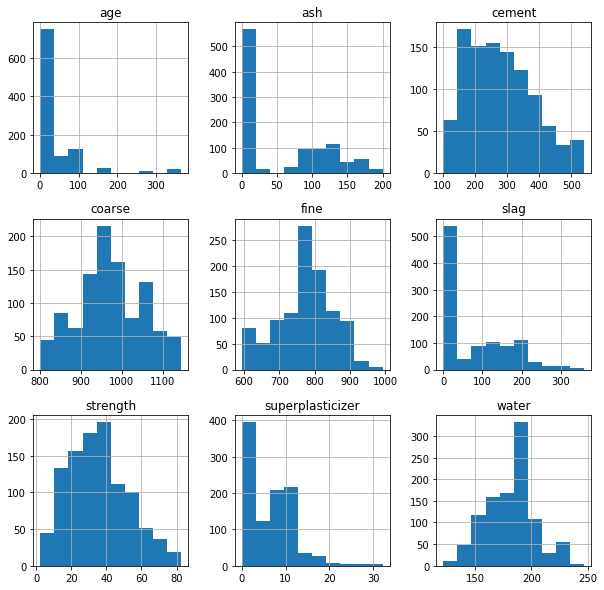

In [8]:
#Histograms of all columns
data.hist(figsize=(10,10))
plt.show()

In [9]:
#Descriptive statistics for the data
data.describe()

,cement,slag,ash,water,superplasticizer,coarse,fine,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
#Create modified factors
data["ash_modified"] = np.where(data.ash >0,1,0)
data["age_squared"] =data["age"] **2
data["age_log"]=np.log10(data["age"])

In [11]:
def run_knn(number_neighbors):
    knn = neighbors.KNeighborsRegressor(n_neighbors=number_neighbors, weights='distance')
    knn.fit(X, Y)
    score = cross_val_score(knn, X, Y, cv=5)
    print("KNN R-Squared: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))    

In [12]:
def run_knn_multiples():
    number_neighbors=range(2,20)
    for num in number_neighbors:
        knn = neighbors.KNeighborsRegressor(n_neighbors=num, weights='distance')
        knn.fit(X, Y)
        score = cross_val_score(knn, X, Y, cv=5)
        print("KNN R-Squared: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))  
        print(num)
        return 

In [13]:
#Run KNN for all factors
X = data[["cement","slag","ash","water","superplasticizer","coarse","fine","age_log","age","strength"]]
Y = data["strength"]
run_knn(15)

KNN R-Squared: 0.39 (+/- 0.24)


In [14]:
#OLS on original model
linear_formula = "strength ~ cement+slag+ash+water+superplasticizer+coarse+fine+age_log"
print_OLS_output(data)

Parameters:
Intercept          -77.533388
cement               0.134857
slag                 0.115945
ash                  0.094391
water               -0.128817
superplasticizer     0.118822
coarse               0.029681
fine                 0.035989
age_log             20.139779
dtype: float64

 P-Values
Intercept            2.550382e-05
cement               5.121581e-95
slag                 3.099533e-55
ash                  1.950061e-26
water                3.359978e-06
superplasticizer     6.517613e-02
coarse               4.912984e-06
fine                 1.194949e-06
age_log             1.438418e-248
dtype: float64

 R-Squared:
0.818508605438


In [15]:
# OLS after modifying model
linear_formula = "strength ~ cement+slag+water+age+ash_modified+age_log"
print_OLS_output(data)

Parameters:
Intercept        7.177524
cement           0.110511
slag             0.086127
water           -0.234930
age             -0.035163
ash_modified     8.059758
age_log         23.157518
dtype: float64

 P-Values
Intercept        4.697846e-03
cement          1.832237e-237
slag            1.968006e-133
water            6.966443e-83
age              5.499107e-10
ash_modified     1.725287e-42
age_log         1.179563e-177
dtype: float64

 R-Squared:
0.828301987534


In [16]:
#Run KNN with model updates from OLS
X = data[["cement","slag","ash","water","age","ash_modified","age_log"]]
Y = data["strength"]
run_knn(15)

KNN R-Squared: 0.48 (+/- 0.22)


Between the two models I like OLS regression more because of the ability to easily see p-values and which features are benefiting the model and which aren't.  Seeing the p-values for KNN may be possible but the quick research I found made it seem like they were more complex to reach.  But with OLS and statsmodels it's easy to quickly see. With extensive domain knowledge and experience I imagine KNN may become more useful than I currently see it.  The key challenges(which with experience may become benefits) are in part how much adjusting can be done to KNN.  Being able to choose the number of neighbors as well as whether to use weighting or not may be powerful tools I'll need to master long term, but as this point I'm still guessing and haven't fully gotten and understanding of how to get the most of either adjustments.  That being said I also wonder whether KNN is more sensitive to noise and outliers.  My current thinking is that OLS by building a model that is designed to draw across the dataset, may be less susceptible to being distorted.  Also in terms of making predictions that aren't explicitly within your dataset KNN doesn't seem like that would be possible at all, while with OLS the farther outside the bounds of your dataset the less accurately it obviously becomes.  But I still believe based on my current understand OLS would be more effective for than KNN.  One unfortunate piece to this exercise was that I didn't realize that this data set was in the UCI datbase submitted by someone who did reasearch as to why regression is not an appropriate modeling method for this specific set of data.  Instead they suggested and I briefly glanced through their paper as to how they were able to obtain much better results using neural networks.  However while I was never able to obtain a particularly good rsquared, I was able to make adjustments to the model to improve it versus my first version.

In [17]:
#Normalize data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
norm_data= pd.DataFrame(np_scaled)
norm_data.columns =["cement","slag","ash","water","superplasticizer","coarse","fine","age","strength","age_squared","ash_modified","age_log"]
norm_data.head()

,cement,slag,ash,water,superplasticizer,coarse,fine,age,strength,age_squared,ash_modified,age_log
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485,0.0,0.005877,0.564790
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996,0.0,0.005877,0.564790
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655,0.0,0.547191,0.948902
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372,0.0,1.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860,0.0,0.972790,0.997662


In [19]:
#Run KNN with model updates from OLS on normalized data
X = norm_data[["cement","slag","ash","water","superplasticizer","age","ash_modified","age_log"]]
Y = norm_data["strength"]
run_knn(15)

KNN R-Squared: 0.54 (+/- 0.50)


In [20]:
# OLS after modifying model
linear_formula = "strength ~ cement+slag+water+age+ash_modified+age_log"
print_OLS_output(norm_data)

Parameters:
Intercept      -0.031189
cement          0.503818
slag            0.292658
water          -0.430517
age            -0.158663
ash_modified   -0.057614
age_log         0.763696
dtype: float64

 P-Values
Intercept        6.635054e-02
cement          4.926045e-202
slag             5.944898e-93
water            3.637011e-98
age              9.007413e-02
ash_modified     4.789270e-01
age_log          1.019280e-87
dtype: float64

 R-Squared:
0.794021107012


In [24]:
#Run KNN for 20 trials with no weights
X = data[["cement","slag","ash","water","superplasticizer","age","ash_modified","age_log"]]
Y = data["strength"]
run_knn_trials(20,None)

Number of Neighbors: 1, KNN R-Squared: 0.19 (+/- 1.06)
Number of Neighbors: 2, KNN R-Squared: 0.31 (+/- 0.60)
Number of Neighbors: 3, KNN R-Squared: 0.34 (+/- 0.51)
Number of Neighbors: 4, KNN R-Squared: 0.39 (+/- 0.37)
Number of Neighbors: 5, KNN R-Squared: 0.41 (+/- 0.31)
Number of Neighbors: 6, KNN R-Squared: 0.43 (+/- 0.29)
Number of Neighbors: 7, KNN R-Squared: 0.45 (+/- 0.25)
Number of Neighbors: 8, KNN R-Squared: 0.46 (+/- 0.23)
Number of Neighbors: 9, KNN R-Squared: 0.47 (+/- 0.20)
Number of Neighbors: 10, KNN R-Squared: 0.46 (+/- 0.20)
Number of Neighbors: 11, KNN R-Squared: 0.46 (+/- 0.20)
Number of Neighbors: 12, KNN R-Squared: 0.45 (+/- 0.19)
Number of Neighbors: 13, KNN R-Squared: 0.45 (+/- 0.17)
Number of Neighbors: 14, KNN R-Squared: 0.44 (+/- 0.17)
Number of Neighbors: 15, KNN R-Squared: 0.43 (+/- 0.16)
Number of Neighbors: 16, KNN R-Squared: 0.42 (+/- 0.17)
Number of Neighbors: 17, KNN R-Squared: 0.42 (+/- 0.18)
Number of Neighbors: 18, KNN R-Squared: 0.40 (+/- 0.17)
N

In [211]:
def plot_knn(x_data,score_data,var_data):
    plt.figure(figsize=(24,10))
    plt.subplot(1,2,1)
    plt.plot(x_data,score_data)
    plt.title("KNN R-Squared by Number of K")
    plt.xlabel("Number of Neighbors")
    plt.ylabel("R-Squared")
    plt.xticks(x_data,x_data)
    plt.subplot(1,2,2)
    plt.title("KNN Variance by Number of K")
    plt.ylabel("Variance")
    plt.plot(x_data,var_data)
    plt.xlabel("Number of Neighbors")
    plt.subplots_adjust(bottom = .2 , wspace = .2, hspace = .2, left= .125)
    plt.xticks(x_data,x_data)
    plt.show()
    

In [212]:
def run_knn_trials(trials, weight_option):
    number_neighbors=1
    cols =["number_neighbors","score","variance"]
    rows=trials+1
    knn_data=pd.DataFrame(columns=cols, index=range(1,rows))
    while number_neighbors <trials+1:
        knn = neighbors.KNeighborsRegressor(n_neighbors=number_neighbors, weights=weight_option)
        knn.fit(X, Y)
        score = cross_val_score(knn, X, Y, cv=5)
        print("Number of Neighbors: %0.f, KNN R-Squared: %0.2f (+/- %0.2f)" % (number_neighbors,score.mean(), score.std() * 2))
        knn_data.loc[number_neighbors].number_neighbors=number_neighbors
        knn_data.loc[number_neighbors].score=score.mean()
        knn_data.loc[number_neighbors].variance=score.std() * 2
        number_neighbors +=1
    x_data=knn_data["number_neighbors"]
    score_data=knn_data["score"]
    var_data=knn_data["variance"]
    plot_knn(x_data,score_data,var_data)

Number of Neighbors: 1, KNN R-Squared: 0.19 (+/- 1.06)
Number of Neighbors: 2, KNN R-Squared: 0.32 (+/- 0.65)
Number of Neighbors: 3, KNN R-Squared: 0.35 (+/- 0.56)
Number of Neighbors: 4, KNN R-Squared: 0.40 (+/- 0.43)
Number of Neighbors: 5, KNN R-Squared: 0.43 (+/- 0.36)
Number of Neighbors: 6, KNN R-Squared: 0.45 (+/- 0.33)
Number of Neighbors: 7, KNN R-Squared: 0.47 (+/- 0.29)
Number of Neighbors: 8, KNN R-Squared: 0.48 (+/- 0.27)
Number of Neighbors: 9, KNN R-Squared: 0.49 (+/- 0.25)
Number of Neighbors: 10, KNN R-Squared: 0.49 (+/- 0.24)
Number of Neighbors: 11, KNN R-Squared: 0.49 (+/- 0.24)
Number of Neighbors: 12, KNN R-Squared: 0.49 (+/- 0.24)
Number of Neighbors: 13, KNN R-Squared: 0.49 (+/- 0.23)
Number of Neighbors: 14, KNN R-Squared: 0.48 (+/- 0.22)
Number of Neighbors: 15, KNN R-Squared: 0.48 (+/- 0.22)
Number of Neighbors: 16, KNN R-Squared: 0.47 (+/- 0.23)
Number of Neighbors: 17, KNN R-Squared: 0.47 (+/- 0.23)
Number of Neighbors: 18, KNN R-Squared: 0.46 (+/- 0.23)
N

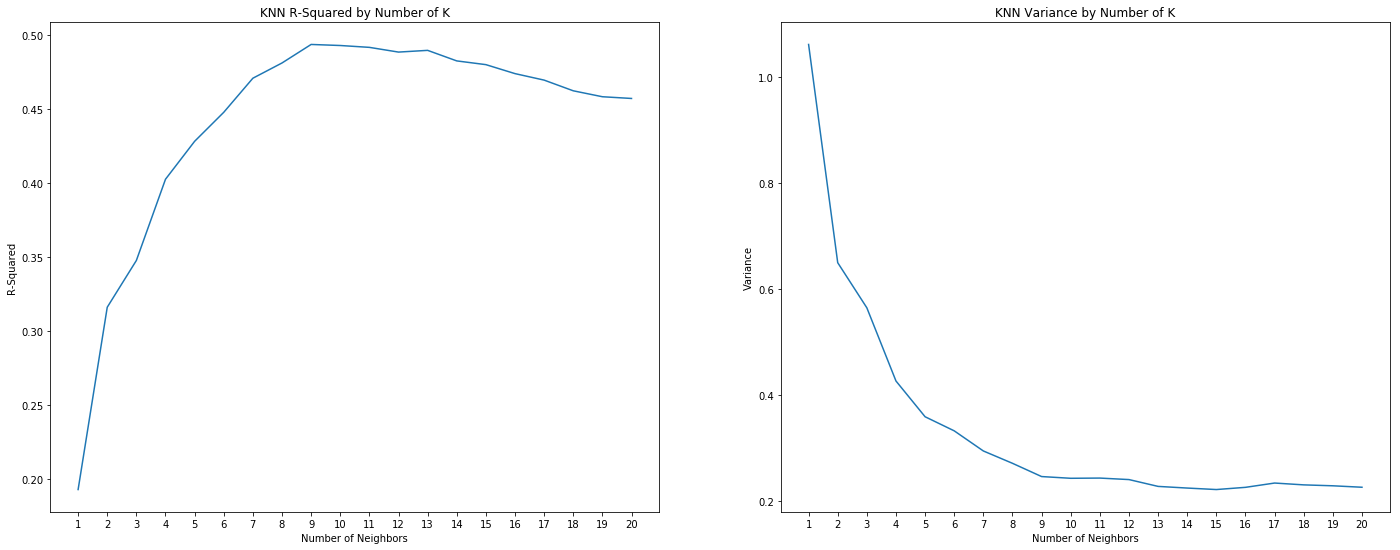

In [213]:
#Run KNN for 20 trials with distance weights
X = data[["cement","slag","ash","water","superplasticizer","age","ash_modified","age_log"]]
Y = data["strength"]
run_knn_trials(20,'distance')

Number of Neighbors: 1, KNN R-Squared: 0.19 (+/- 1.06)
Number of Neighbors: 2, KNN R-Squared: 0.31 (+/- 0.60)
Number of Neighbors: 3, KNN R-Squared: 0.34 (+/- 0.51)
Number of Neighbors: 4, KNN R-Squared: 0.39 (+/- 0.37)
Number of Neighbors: 5, KNN R-Squared: 0.41 (+/- 0.31)
Number of Neighbors: 6, KNN R-Squared: 0.43 (+/- 0.29)
Number of Neighbors: 7, KNN R-Squared: 0.45 (+/- 0.25)
Number of Neighbors: 8, KNN R-Squared: 0.46 (+/- 0.23)
Number of Neighbors: 9, KNN R-Squared: 0.47 (+/- 0.20)
Number of Neighbors: 10, KNN R-Squared: 0.46 (+/- 0.20)
Number of Neighbors: 11, KNN R-Squared: 0.46 (+/- 0.20)
Number of Neighbors: 12, KNN R-Squared: 0.45 (+/- 0.19)
Number of Neighbors: 13, KNN R-Squared: 0.45 (+/- 0.17)
Number of Neighbors: 14, KNN R-Squared: 0.44 (+/- 0.17)
Number of Neighbors: 15, KNN R-Squared: 0.43 (+/- 0.16)
Number of Neighbors: 16, KNN R-Squared: 0.42 (+/- 0.17)
Number of Neighbors: 17, KNN R-Squared: 0.42 (+/- 0.18)
Number of Neighbors: 18, KNN R-Squared: 0.40 (+/- 0.17)
N

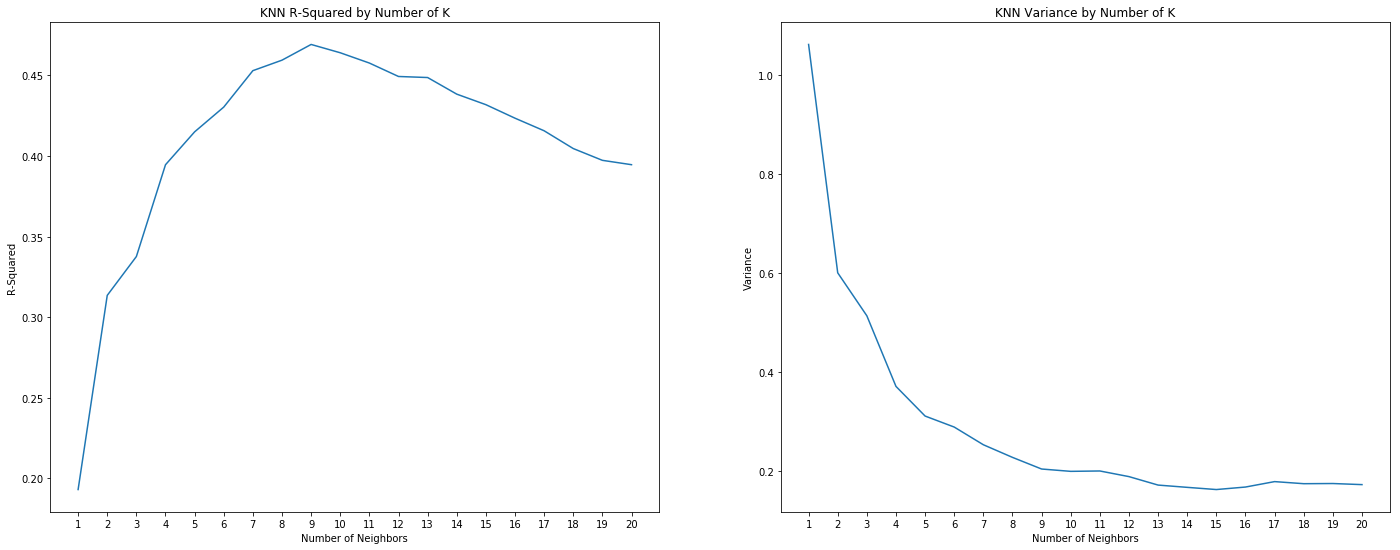

In [214]:
#Run KNN for 20 trials without distance weighting
X = data[["cement","slag","ash","water","superplasticizer","age","ash_modified","age_log"]]
Y = data["strength"]
run_knn_trials(20,None)